In [6]:
pwd

'C:\\Users\\felig\\Jupyter\\01_repositories\\logistic-lemongrass-student-code\\01_week\\07_long_and_wide_data'

In [1]:
ls gapminder*

 Volume in drive C has no label.
 Volume Serial Number is C621-AF0B

 Directory of C:\Users\felig\Jupyter\01_repositories\logistic-lemongrass-student-code\01_week\07_long_and_wide_data

15/07/2020  14:33           373.879 gapminder_population.xlsx
               1 File(s)        373.879 bytes
               0 Dir(s)  371.627.520.000 bytes free


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('gapminder_population.xlsx')

In [4]:
df.shape

(275, 82)

In [5]:
df.head(3)

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Move a column to the index

In [17]:
df2 = df.set_index('Total population') # <- column name OR actual column
df2.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# moving around the index helps with selecting
s = df2.loc[['Finland', 'Afghanistan', 'Japan'], 1950]
s

Total population
Finland         4008299.0
Afghanistan     7752118.0
Japan          82199470.0
Name: 1950, dtype: float64

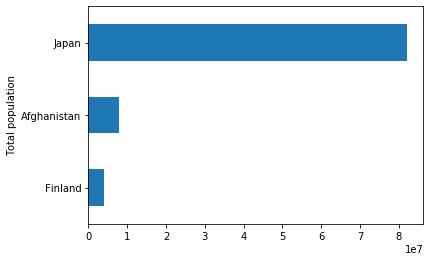

In [16]:
# moving around the index helps with plotting
s.plot.barh()

### 2. Move the index into a column

In [20]:
df = df2.reset_index()

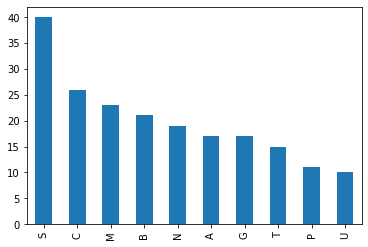

In [21]:
# count first characters
df['Total population'].str[0].value_counts().head(10).plot.bar()

### 3. Transpose

In [28]:
gf = df2.transpose()[['Germany', 'France']]
gf.head()

Total population,Germany,France
1800,22886919.0,29355111.0
1810,23882461.0,30293172.0
1820,25507768.0,31549988.0
1830,28016571.0,33174810.0
1840,31016143.0,34854476.0


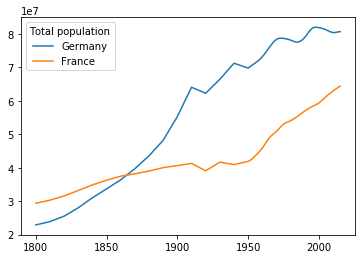

In [30]:
gf.plot()

### 4. Transform Long to Wide format and back

In [35]:
# Long format: many rows, 1 column
s = df2.stack() # <-- results in a series
s # MultiIndex: 2 levels (country, year)

Total population               
Afghanistan                1800    3280000.0
                           1810    3280000.0
                           1820    3323519.0
                           1830    3448982.0
                           1840    3625022.0
                                     ...    
Sint Maarten (Dutch part)  2011      33979.0
                           2012      35134.0
                           2013      36442.0
                           2014      37696.0
                           2015      38745.0
Length: 20176, dtype: float64

In [41]:
# Wide format: few rows, many columns
s = s.unstack(0) # <-- can be 0 or 1, default is 1

In [42]:
s.sample(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Bosnia and Herzegovina,851806.0,851806.0,871970.0,931129.0,1016407.0,1109495.0,1210294.0,1320249.0,1439493.0,1569427.0,...,3838504.0,3840418.0,3839749.0,3837732.0,3835258.0,3832310.0,3828419.0,3823533.0,3817554.0,3810416.0
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32512.0,32443.0,32432.0,32627.0,33125.0,33979.0,35134.0,36442.0,37696.0,38745.0
Denmark,1062514.0,1108146.0,1177749.0,1264714.0,1368238.0,1511190.0,1694397.0,1887120.0,2081766.0,2291557.0,...,5440696.0,5466988.0,5495302.0,5523755.0,5550959.0,5576577.0,5600972.0,5624293.0,5646899.0,5669081.0
Solomon Islands,56998.0,56998.0,57682.0,59648.0,62398.0,65274.0,66648.0,68010.0,69346.0,70661.0,...,480716.0,492075.0,503410.0,514767.0,526177.0,537648.0,549162.0,560685.0,572171.0,583591.0
Peru,1314151.0,1315575.0,1367155.0,1519450.0,1746788.0,2003904.0,2294268.0,2616789.0,2971643.0,3337979.0,...,27949958.0,28292768.0,28642048.0,29001563.0,29373644.0,29759891.0,30158768.0,30565461.0,30973148.0,31376670.0
Bulgaria,1992320.0,2088223.0,2186672.0,2287551.0,2391853.0,2482395.0,2543199.0,2677708.0,2993642.0,3453830.0,...,7624611.0,7568378.0,7513646.0,7460057.0,7407297.0,7355231.0,7303741.0,7252539.0,7201308.0,7149787.0
Croatia,1227886.0,1227886.0,1257048.0,1342619.0,1465995.0,1600709.0,1747990.0,1908823.0,2083435.0,2273902.0,...,4368518.0,4357114.0,4344151.0,4330399.0,4316425.0,4302073.0,4287015.0,4271497.0,4255853.0,4240317.0
Bhutan,89989.0,89989.0,91144.0,94472.0,99137.0,104032.0,109811.0,115908.0,122321.0,129082.0,...,666920.0,681471.0,694990.0,707830.0,720246.0,732246.0,743711.0,754637.0,765008.0,774830.0
Slovenia,469664.0,469664.0,480821.0,513559.0,560762.0,612303.0,668599.0,730072.0,796806.0,869595.0,...,2005566.0,2017452.0,2030599.0,2042804.0,2052480.0,2059023.0,2062881.0,2064819.0,2066068.0,2067526.0
